<a href="https://colab.research.google.com/gist/jonkrohn/9d8802220a065efdaa8d3000a73c403c/big-o-notation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big O Notation

In [1]:
import time

#### Constant Time

In [2]:
def take_first(my_list):
  return my_list[0]

In [3]:
short_list = [13, 25, 42]

In [4]:
tic = time.clock()
first = take_first(short_list)
toc = time.clock()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
first

13

In [6]:
toc-tic

0.000148000000000037

In [7]:
long_list = [42] * 10**8 # one hundred million items

In [8]:
len(long_list)

100000000

In [9]:
tic = time.clock()
first = take_first(long_list)
toc = time.clock()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
first

42

In [11]:
toc-tic

0.00011700000000014477

In [12]:
list_lengths = [10**l for l in range(1, 8)]
list_lengths

[10, 100, 1000, 10000, 100000, 1000000, 10000000]

In [13]:
constant_times = []

for l in list_lengths:
  lst = [42]*l
  
  tic = time.clock()
  x = take_first(lst)
  toc = time.clock()
  
  constant_times.append(toc-tic)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [14]:
import pandas as pd

In [15]:
constant_df = pd.DataFrame(list(zip(list_lengths, constant_times)), columns=['N', 'time'])
constant_df

,N,time
0,10,0.000067
1,100,0.000003
2,1000,0.000003
3,10000,0.000003
4,100000,0.000006
5,1000000,0.000007
6,10000000,0.000007


#### Linear Time

In [16]:
def find_max(my_list):
  max_value = my_list[0]
  for i in range(len(my_list)):
    if my_list[i] > max_value:
      max_value = my_list[i]
  return max_value

In [17]:
tic = time.clock()
largest = find_max(short_list)
toc = time.clock()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
largest

42

In [19]:
toc-tic

0.0005489999999999107

In [20]:
tic = time.clock()
largest = find_max(long_list)
toc = time.clock()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
largest

42

In [22]:
toc-tic

7.541962

In [23]:
linear_times = []

for l in list_lengths:
  lst = [42]*l
  
  tic = time.clock()
  x = find_max(lst)
  toc = time.clock()
  
  linear_times.append(toc-tic)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [24]:
linear_df = pd.DataFrame(list(zip(list_lengths, linear_times)), columns=['N', 'time'])
linear_df

,N,time
0,10,0.000036
1,100,0.000013
2,1000,0.000095
3,10000,0.000940
4,100000,0.013172
5,1000000,0.091079
6,10000000,0.980272


In [25]:
import seaborn as sns

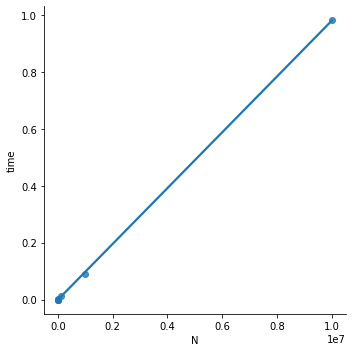

In [26]:
_ = sns.lmplot(x='N', y='time', data=linear_df, ci=None)

#### Polynomial Time

In [27]:
def element_multiplier(my_list): 
  for i in range(len(my_list)):
    for j in range(len(my_list)):
      x = my_list[i] * my_list[j]

In [28]:
list_lengths

[10, 100, 1000, 10000, 100000, 1000000, 10000000]

In [29]:
list_lengths[:4] # compute time gets annoyingly long from list_lengths[5] onward

[10, 100, 1000, 10000]

In [30]:
granular_list_lengths = list_lengths[:4] + [50, 500, 5000]
granular_list_lengths

[10, 100, 1000, 10000, 50, 500, 5000]

In [31]:
granular_list_lengths.sort()

In [32]:
granular_list_lengths

[10, 50, 100, 500, 1000, 5000, 10000]

In [ ]:
poly_times = []

for l in granular_list_lengths:
  lst = [42]*l

  tic = time.clock()
  x = element_multiplier(lst)
  toc = time.clock()

  poly_times.append(toc-tic)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [ ]:
poly_df = pd.DataFrame(list(zip(granular_list_lengths, poly_times)), columns=['N', 'time'])
poly_df

,N,time
0,10,0.000048
1,50,0.000370
2,100,0.001399
3,500,0.058588
4,1000,0.142114
5,5000,2.943034
6,10000,10.261481


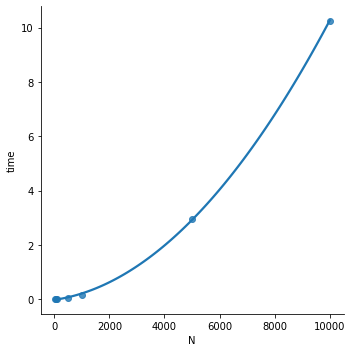

In [ ]:
_ = sns.lmplot(x='N', y='time', data=poly_df, ci=None, order=2)

 #### In Big O notation: 

 * constant: O(1)
 * linear: O(N)
 * polynomial: O(N**2) 
 

 #### Others

* logarithmic: O(log N)
* exponential: O(2**N)
* O(N log N)
* O(N!) 